# Guia do Simulador 
##### Este documento tem como objetivo apresentar o funcionamento detalhado de uma simulação de rede quântica, abordando cada uma das camadas envolvidas: física, de enlace, de rede, de transporte e de aplicação.


In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


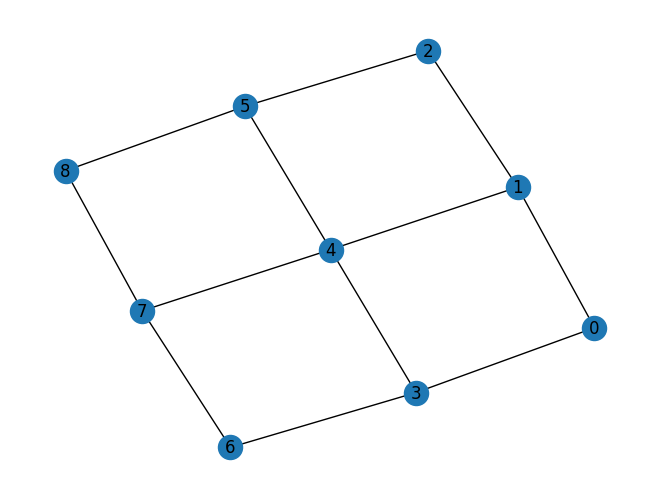

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()
Logger.activate(Logger)

##### Primeiramente, vamos definir os hosts de Alice e Bob.

In [3]:
alice = rede.get_host(3)
bob = rede.get_host(4)

##### Será, então, realizado o protocolo de criação de entrelaçamento entre Alice e Bob.

In [4]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-09-17 00:45:19,626: Timeslot 1: Par epr criado com fidelidade 0.2058952677265754
2024-09-17 00:45:19,628: Timeslot 2: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

##### Ao enviar uma solicitação(request) para a rede, se a fidelidade dos qubits for superior a 0.5, a rede aceita a conexão e envia a chave. Caso contrário, uma nova tentativa de entrelaçamento é realizada. Se a tentativa falhar novamente, a rede tenta purificar o entrelaçamento para recuperar a conexão.

In [5]:
rede.linklayer.request(1,2)

2024-09-17 00:45:19,653: Timeslot 3: Tentativa de emaranhamento entre 1 e 2.
2024-09-17 00:45:19,655: Timeslot 4: Par epr criado com fidelidade 0.13436198681846262
2024-09-17 00:45:19,656: Timeslot 5: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-09-17 00:45:19,657: Timeslot 5: Entrelaçamento falhou entre 1 e 2 na tentativa 1.
2024-09-17 00:45:19,659: Timeslot 6: Tentativa de emaranhamento entre 1 e 2.
2024-09-17 00:45:19,662: Timeslot 7: Par epr criado com fidelidade 0.004928535450387902
2024-09-17 00:45:19,663: Timeslot 8: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-09-17 00:45:19,664: Timeslot 8: Entrelaçamento falhou entre 1 e 2 na tentativa 2.
2024-09-17 00:45:19,665: A purificação utilizada foi tipo 1.
2024-09-17 00:45:19,666: Timeslot 9: Purificação falhou no canal (1, 2) devido a baixa fidelidade após purificação.


False

##### Logo, será realizado o entanglement swapping entre Alice e Bob, o que permite criar um par de qubits emaranhados entre dois nós que não têm uma conexão direta de emaranhamento, utilizando pares intermediários.

In [6]:
rede.networklayer.entanglement_swapping(8,0)


2024-09-17 00:45:19,683: Timeslot 10: Buscando rota válida entre 8 e 0.
2024-09-17 00:45:19,687: Rota válida encontrada: [8, 5, 2, 1, 0]
2024-09-17 00:45:19,690: Timeslot 11: Realizando Entanglement Swapping.
2024-09-17 00:45:19,691: Entanglement Swapping falhou entre 8-5 e 5-2


False

##### A função a seguir é chamada para que seja realizada a requesição de uma rota para que haja a transmissão de n qubits necessários. Ela vai executar toda a camada de transporte.

In [7]:
rede.transportlayer.run_transport_layer(0,8,11)

2024-09-17 00:45:19,707: Número insuficiente de qubits na memória de Alice (Host 0). Criando mais 1 qubits para completar os 11 necessários.
2024-09-17 00:45:19,709: Timeslot antes da criação do qubit: 12
2024-09-17 00:45:19,710: Qubit 90 adicionado à memória do Host 0.
2024-09-17 00:45:19,712: Qubit 90 criado com fidelidade inicial 0.6951925354232726 e adicionado à memória do Host 0.
2024-09-17 00:45:19,713: Qubit criado para Alice (Host 0) no timeslot: 13
2024-09-17 00:45:19,716: Tentativa 1 de transmissão de qubits entre 0 e 8.
2024-09-17 00:45:19,717: Timeslot 14: Buscando rota válida entre 0 e 8.
2024-09-17 00:45:19,718: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-17 00:45:19,720: Teletransporte de qubit de 0 para 8 na rota [0, 3, 6, 7, 8] foi bem-sucedido com fidelidade final de 0.0004518627869921641.
2024-09-17 00:45:19,722: Timeslot 15: Buscando rota válida entre 0 e 8.
2024-09-17 00:45:19,723: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-17 00:45:19,724: Teletransporte 

True

##### Por meio da chamada da função qks_e91_protocol, passando os argumentos do ID de Alice, ID de Bob e o número de chaves que é pedido nessa requisição. Houve a transmissão das chaves. 

In [8]:
rede.application_layer.run_app("QKD_E91",0,8,5)

2024-09-17 00:45:19,773: Iniciando protocolo E91 com 10 qubits.
2024-09-17 00:45:19,776: Timeslot incrementado na função prepare_e91_qubits: 25
2024-09-17 00:45:19,776: Qubits preparados com a chave: [0, 1, 0, 1, 0, 0, 0, 1, 1, 1] e bases: [1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
2024-09-17 00:45:19,778: Timeslot incrementado na função apply_bases_and_measure_e91: 26
2024-09-17 00:45:19,779: Resultados das medições: [0, 1, 0, 0, 0, 0, 0, 0, 0, 1] com bases: [1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
2024-09-17 00:45:19,781: Índices comuns: [0, 4, 5, 7, 8]
2024-09-17 00:45:19,782: Transmitindo 3 qubits coincidentes de Alice (ID 0) para Bob (ID 8).
2024-09-17 00:45:19,783: Número insuficiente de qubits na memória de Alice (Host 0). Criando mais 3 qubits para completar os 3 necessários.
2024-09-17 00:45:19,783: Timeslot antes da criação do qubit: 27
2024-09-17 00:45:19,787: Qubit 91 adicionado à memória do Host 0.
2024-09-17 00:45:19,788: Qubit 91 criado com fidelidade inicial 0.6615860815317215 e adicionado à

[0, 0, 0, 1, 1]

##### Nessa função get_teleported_qubits, pode-se analisar os qubits teletransportados. 

In [9]:
rede.transportlayer.get_teleported_qubits()

[{'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.00197520167165819,
  'fidelity_route': 0.22876792454960987,
  'F_final': 0.0004518627869921641,
  'timeslot': 14,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x20964555d10>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.008994368338470154,
  'fidelity_route': 0.2058911320946492,
  'F_final': 0.001851860679683889,
  'timeslot': 15,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x20964555d50>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.0068071974579010566,
  'fidelity_route': 0.1853020188851842,
  'F_final': 0.0012613874318991593,
  'timeslot': 16,
  'qubit': <quantumnet.objects.qubit.Qubit at 0x20964555d90>},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.1245913774647762,
  'fidelity_route': 0.16677181699666568,
  'F_final': 0.020778330401918156,
  'timeslot': 17,
  'qubit': <quantumnet.object

##### A função get_timeslot apresenta quantos timeslot se passaram durante a execução da camada.

In [10]:
rede.get_timeslot()

66

##### Nesta função, get_total_used_erps, será calculado a quantidade de pares EPRs usados na camada de Rede.

In [11]:
rede.get_total_useds_eprs()

2024-09-17 00:45:20,043: Eprs usados na camada PhysicalLayer: 3
2024-09-17 00:45:20,051: Eprs usados na camada LinkLayer: 2
2024-09-17 00:45:20,054: Eprs usados na camada NetworkLayer: 0


5

##### A função get_total_useds_qubits, será usada para mostrar quantos qubits foram usados em todas as camadas.

In [12]:
rede.get_total_useds_qubits()

2024-09-17 00:45:20,073: Qubits usados na camada PhysicalLayer: 18
2024-09-17 00:45:20,073: Qubits usados na camada LinkLayer: 4
2024-09-17 00:45:20,075: Qubits usados na camada TransportLayer: 22
2024-09-17 00:45:20,076: Qubits usados na camada ApplicationLayer: 18


62

##### No avg_fidelity_on_linklayer, é realizada o cálculo da média da fidelidade dos ERPs criados na camada de Enlace.

In [13]:
rede.linklayer.avg_fidelity_on_linklayer()

2024-09-17 00:45:20,096: A fidelidade média dos EPRs criados na camada de enlace é 0.00015699777255384444


Total de EPRs criados na camada de enlace: 3
Total de fidelidade dos EPRs criados na camada de enlace: 0.0004709933176615333


0.00015699777255384444

In [14]:
rede.transportlayer.avg_fidelity_on_transportlayer()

2024-09-17 00:45:20,120: Fidelidade do qubit utilizado de 0 para 8: 0.0004518627869921641
2024-09-17 00:45:20,125: Fidelidade do qubit utilizado de 0 para 8: 0.001851860679683889
2024-09-17 00:45:20,126: Fidelidade do qubit utilizado de 0 para 8: 0.0012613874318991593
2024-09-17 00:45:20,130: Fidelidade do qubit utilizado de 0 para 8: 0.020778330401918156
2024-09-17 00:45:20,132: Fidelidade do qubit utilizado de 0 para 8: 0.0012049606096686482
2024-09-17 00:45:20,135: Fidelidade do qubit utilizado de 0 para 8: 0.006349479582106946
2024-09-17 00:45:20,138: Fidelidade do qubit utilizado de 0 para 8: 0.014562822679530166
2024-09-17 00:45:20,140: Fidelidade do qubit utilizado de 0 para 8: 0.010465007781304552
2024-09-17 00:45:20,141: Fidelidade do qubit utilizado de 0 para 8: 0.002336477805582807
2024-09-17 00:45:20,146: Fidelidade do qubit utilizado de 0 para 8: 0.00046830201316075523
2024-09-17 00:45:20,149: Fidelidade do qubit utilizado de 0 para 8: 0.017401750220749763
2024-09-17 00:45

0.005462782263921756

##### Pode-se gerar um arquivo em csv, print ou variável para setar métricas escolhidas pelo próprio usuário. 

In [ ]:
# rede.get_metrics(file_name="teste.csv")

##### Por meio do display_all_qubits_timeslot, pode-se verificar em qual timeslot cada qubit foi criado.

In [16]:
rede.display_all_qubit_timeslots()

Qubit 0 foi criado no timeslot 0
Qubit 1 foi criado no timeslot 0
Qubit 2 foi criado no timeslot 0
Qubit 3 foi criado no timeslot 0
Qubit 4 foi criado no timeslot 0
Qubit 5 foi criado no timeslot 0
Qubit 6 foi criado no timeslot 0
Qubit 7 foi criado no timeslot 0
Qubit 8 foi criado no timeslot 0
Qubit 9 foi criado no timeslot 0
Qubit 10 foi criado no timeslot 0
Qubit 11 foi criado no timeslot 0
Qubit 12 foi criado no timeslot 0
Qubit 13 foi criado no timeslot 0
Qubit 14 foi criado no timeslot 0
Qubit 15 foi criado no timeslot 0
Qubit 16 foi criado no timeslot 0
Qubit 17 foi criado no timeslot 0
Qubit 18 foi criado no timeslot 0
Qubit 19 foi criado no timeslot 0
Qubit 20 foi criado no timeslot 0
Qubit 21 foi criado no timeslot 0
Qubit 22 foi criado no timeslot 0
Qubit 23 foi criado no timeslot 0
Qubit 24 foi criado no timeslot 0
Qubit 25 foi criado no timeslot 0
Qubit 26 foi criado no timeslot 0
Qubit 27 foi criado no timeslot 0
Qubit 28 foi criado no timeslot 0
Qubit 29 foi criado no t